In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [193]:
df = pd.read_csv("penguins_size.csv")

### EDA

In [194]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [195]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [196]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [197]:
# Droping the rows of null values except sex
df = df.dropna(subset=['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g'])
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [198]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [199]:
mode = df['sex'].mode()

In [200]:

df['sex'] = df['sex'].fillna(mode[0])

In [201]:
df = df.replace({'sex' : {'.' : mode}})

In [202]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [203]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<Axes: xlabel='sex', ylabel='Count'>

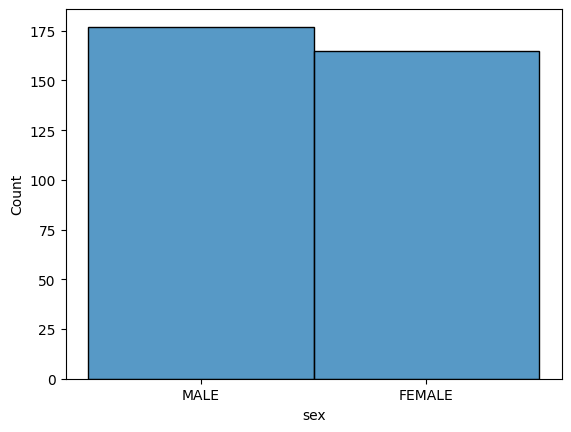

In [204]:
sns.histplot(df,x='sex')

<Axes: >

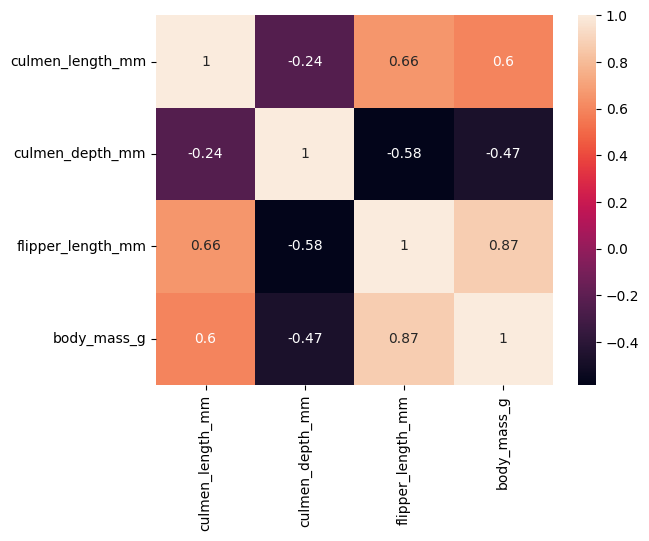

In [205]:
sns.heatmap(df.corr(numeric_only= True), annot=True)

### ML Model

In [206]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [207]:
for i in df.select_dtypes(object) :
    print(df[i].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE']


In [208]:
x = df.drop(columns='species')
y = df['species']

In [209]:
# Converting the column into numerics
x_one_hot  = pd.get_dummies(x, drop_first=True)
x_one_hot

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,True,True
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,False
340,46.8,14.3,215.0,4850.0,False,False,False
341,50.4,15.7,222.0,5750.0,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,False


In [210]:
y_one_hot = pd.get_dummies(y)
y_one_hot

,Adelie,Chinstrap,Gentoo
0,True,False,False
1,True,False,False
2,True,False,False
4,True,False,False
5,True,False,False
...,...,...,...
338,False,False,True
340,False,False,True
341,False,False,True
342,False,False,True


In [211]:
# Converting these dfs to integer
x_one_hot = x_one_hot.astype(int)
y_one_hot = y_one_hot.astype(int)

In [216]:
from sklearn.preprocessing import LabelEncoder
x_label = x.copy()
for i in x_label.select_dtypes(object) :
    le = LabelEncoder()
    
    x_label[i] = le.fit_transform(x_label[i].astype(str))

In [217]:
x_label

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,1
1,2,39.5,17.4,186.0,3800.0,0
2,2,40.3,18.0,195.0,3250.0,0
4,2,36.7,19.3,193.0,3450.0,0
5,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...
338,0,47.2,13.7,214.0,4925.0,0
340,0,46.8,14.3,215.0,4850.0,0
341,0,50.4,15.7,222.0,5750.0,1
342,0,45.2,14.8,212.0,5200.0,0
